Εργασία αριθμητικής ανάλυσης <br>
Εαρινό Εξάμηνο 2023 <br> 
Διδάσκων: Κωνσταντίνος Παπαλάμπρου <br> 

Ιωάννης Δημουλιός 10641 <br> 
Δημήτριος Διακολουκάς 10642


In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
# Changed slightly the implementation of LUMine, so that it was clearer and it didn't change matrix A. 
def LUMine(A): 
    n = A.shape[0] # A dimension
    L = np.eye(n) # create unity part of L
    U = A.copy()
    for j in range(0, n - 1):
        for i in range(j + 1, n): 
            mult = U[i, j] / U[j, j]
            U[i, j + 1:] -= mult * U[j, j + 1:]
            L[i, j] = mult
    return L, U 
    
'''
def LUMine(A): 
    n = A.shape[0] # A dimension
    L = np.matrix( np.identity(n) ) # create unity part of L
    U = A
    for j in range(0, n - 1):
        for i in range(j + 1, n): 
            mult = A[i, j] / A[j, j]
            A[i, j + 1:n] = A[i, j + 1:n] - mult * A[j, j + 1:n]
            U[i, j + 1:n] = A[i, j + 1:n]
            L[i, j] = mult
            U[i, j] = 0
    return L, U 
'''

A = np.matrix([[2., 7., 1.],
              [3., -2., 0.], 
              [1., 5., 3.]])
L, U = LUMine(A)
print(L)
print(U)


[[ 1.    0.    0.  ]
 [ 1.5   1.    0.  ]
 [ 0.5  -0.12  1.  ]]
[[  2.     7.     1.  ]
 [  3.   -12.5   -1.5 ]
 [  1.     1.5    2.32]]


In [ ]:
def QRMine(A):
    n = A.shape[0]
    Q = np.matrix( np.zeros((n, n)) )
    for j in range(n): # column iteration
        q = A[:, j]
        # projection iteration
        for i in range(j): 
            length_of_leg = np.sum( A[:, j].T * Q[:, i] )
            q = q - length_of_leg * Q[:, i] # projections
        Q[:, j] = q / np.linalg.norm(q)
    R = np.transpose(Q) * A
    return Q, R 

# matrix A taken from https://en.wikipedia.org/wiki/QR_decomposition
A = np.matrix([[12, -51, 4], 
              [6, 167, -68], 
              [-4, 24, -41]]) 

Q, R = QRMine(A)
print(Q)
print(R)
err = np.linalg.norm(A - Q*R)
print(err)

[[ 0.85714286 -0.39428571 -0.33142857]
 [ 0.42857143  0.90285714  0.03428571]
 [-0.28571429  0.17142857 -0.94285714]]
[[ 1.40000000e+01  2.10000000e+01 -1.40000000e+01]
 [-2.22044605e-16  1.75000000e+02 -7.00000000e+01]
 [-1.33226763e-15 -1.95399252e-14  3.50000000e+01]]
2.675614455574772e-14


In [ ]:
def create_hilbert(n): 
    H = np.matrix( np.empty((n, n)) )
    for i in range(n): 
        for j in range(n): 
            H[i, j] = 1 / (i + j + 1)
    return H

H = create_hilbert(4)
print(H)

[[1.         0.5        0.33333333 0.25      ]
 [0.5        0.33333333 0.25       0.2       ]
 [0.33333333 0.25       0.2        0.16666667]
 [0.25       0.2        0.16666667 0.14285714]]


In [ ]:
# Solve linear systems using LU Decomposition
def solve_system(A, b): 
    At = A.copy()
    L, U = LUMine(At)
    n = At.shape[0]
    y = np.empty( (n, 1) )
    x = np.empty( (n, 1) )
    for i in range(n):
        y[i] = b[i] - np.dot(L[i, :i], y[:i]) # L[i, i] = 1

    for i in range(n - 1, -1, -1):
        x[i] = (y[i] - np.dot(U[i, i+1:], x[i+1:]))/ U[i, i]
    return x

# Solve linear systems using QR Decomposition
def solve_system2(A, b): 
    n = A.shape[0] 
    Q, R = QRMine(A)  
    y = np.transpose(Q) * b  
    x = np.empty( (n, 1) )
    for i in range(n - 1, -1, -1):
        x[i] = (y[i] - np.dot(R[i, i+1:], x[i+1:])) / R[i, i]
    return x
    

dim = 4
H = create_hilbert(dim)
b = np.ones( (dim, 1) )
x1 = solve_system(H, b)
x2 = solve_system2(H, b)
print(x1)
print(x2)



[[  -4.]
 [  60.]
 [-180.]
 [ 140.]]
[[  -3.99999998]
 [  59.99999978]
 [-179.99999947]
 [ 139.99999966]]


In [ ]:
tiny = 1e-15
max_dim = 100

maxdiffs = list() # List for maximum absolute differences generated from the LU solutions
maxdiffs2 = list() # List for maximum absolute differences generated from the QR solutions
for d in range(1, max_dim): 
    H = create_hilbert(d)
    b = np.ones( (d, 1) )
    x = solve_system(H, b) # LU Solution
    y = solve_system2(H, b) # QR Solution
    b_new = b + tiny
    x_new = solve_system(H, b_new) # LU New Solution 
    y_new = solve_system2(H, b_new) # QR New Solution 
    maxdiffs.append( np.max(np.abs(x - x_new)) )
    maxdiffs2.append( np.max(np.abs(y - y_new)) )

print(max(maxdiffs))
print(maxdiffs)
print(max(maxdiffs2))
print(maxdiffs2)

14449.66374206543
[1.1102230246251565e-15, 6.217248937900877e-15, 1.7763568394002505e-14, 9.094947017729282e-13, 2.0236257114447653e-11, 3.965396899729967e-10, 4.612957127392292e-09, 4.48198989033699e-09, 4.085944965481758e-06, 0.0004783123731613159, 0.025516144931316376, 0.7314082384109497, 5.718431711196899, 17.85621166229248, 17.152161598205566, 58.98477554321289, 54.95848190784454, 106.63530731201172, 26.023767471313477, 83.8023841381073, 52.73869967460632, 159.66598653793335, 445.3780937194824, 212.70784068107605, 351.3109436035156, 213.60117053985596, 290.60306203365326, 1083.1386947631836, 135.6049706824124, 161.15095901489258, 201.96290683746338, 252.39959239959717, 60.454795360565186, 60.454776763916016, 220.0491919517517, 1622.9747200012207, 233.55294752120972, 81.7088611125946, 124.1666145324707, 124.0419979095459, 120.1278281211853, 110.13402968645096, 523.3744592666626, 523.3186349868774, 370.8315887451172, 479.26515197753906, 571.037184715271, 576.9922332763672, 699.31880

### Ερώτημα (γ)
Παρατηρούμε ότι για απειροελάχιστες μεταβολές του `b`:
- Με χρήση της παραγοντοποίησης LU για επαρκώς μεγάλη διάσταση (π.χ. $n \geq 22$) προκύπτουν μεγάλες μεταβολές στη λύση του συστήματος. 
- Με χρήση της παραγοντοποίησης QR η λύση του συστήματος μεταβάλλεται ελάχιστα (τάξη $10^{-7}$).

Επομένως, η επίλυση με QR είναι πολύ σταθερότερη από την επίλυση με LU για μεγαλυτέρες διαστάσεις. 
Δεδομένης της τάξεως της μεταβολής ($10^{-15}$) περιμέναμε οι μεταβολές της λύσης του συστήματος να είναι επίσης μικρές. Αυτό επιτυγχάνεται, λοιπόν, μόνο με τη χρήση της μεθόδου QR και όχι με τη χρήση της LU.  

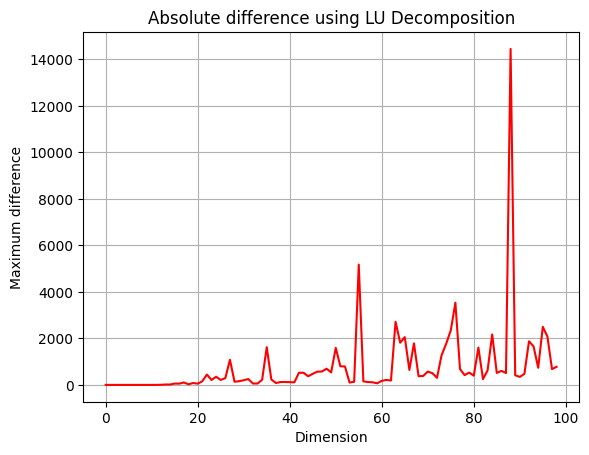

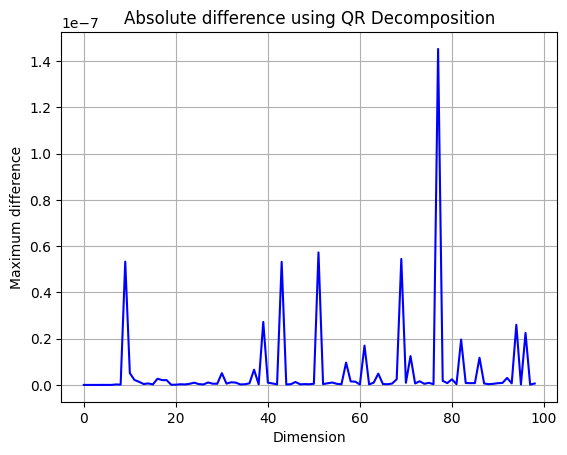

In [ ]:
plt.plot(maxdiffs, color = (1, 0, 0))
plt.xlabel("Dimension")
plt.ylabel("Maximum difference")
plt.title("Absolute difference using LU Decomposition")
plt.grid()
plt.show()

plt.plot(maxdiffs2, color = (0, 0, 1))
plt.xlabel("Dimension")
plt.ylabel("Maximum difference")
plt.title("Absolute difference using QR Decomposition")
plt.grid()
plt.show()

### Ερώτημα (δ) 
Τα διαγράμματα επιβεβαιώνουν τις παρατηρήσεις του προηγούμενου ερωτήματος. 

Επίσης, προκύπτουν "καρφιά" (spikes) για φαινομενικά τυχαίες διαστάσεις.
Αυτά είναι αμελητέα στη μέθοδο QR (δεδομένης της τάξης μεγέθους τους), αλλά κρίσιμα στη μέθοδο LU. Επομένως, η μέθοδος QR είναι ακριβέστερη και σταθερότερη για την επίλυση του συστήματος $\mathbf{Hx} = \mathbf{b}$.  

[0.0, 3.700743415417185e-17, 9.374283304411335e-15, 3.8070941655443306e-13, 1.0558402791593794e-11, 2.617966225735497e-10, 8.238670956380999e-09, 2.484950300375891e-07, 4.929490200598797e-06, 0.00015650874776109764, 0.005809827714483135, 0.21734499612001237, 4.093772643454182, 4.63098333381631, 5.822733019135811, 23.02290481144721, 9.155818196069104, 7.057038583915995, 8.62141953659405, 23.108806866134874, 31.276210507757174, 18.94860903085169, 12.19481169428606, 143.64315876299804, 19.63829135253539, 23.9369705658347, 627.3789266983467, 18.303292648461287, 40.765900347359924, 21.23292085520072, 129.81651335027016, 32.272017660429896, 45.2203327892862, 644.8854871072792, 584.0724874200257, 39.62163599870879, 29.911270889798455, 57.69650110057976, 47.17109641277437, 194.26553307540627, 89.23189209717368, 37.323398385545886, 28.19286886304302, 57.25041159650642, 47.23940127624289, 32.36160201205245, 51.96503992390418, 27.62211071383271, 1045.0648250815345, 81.1044752411239, 60.4814113348

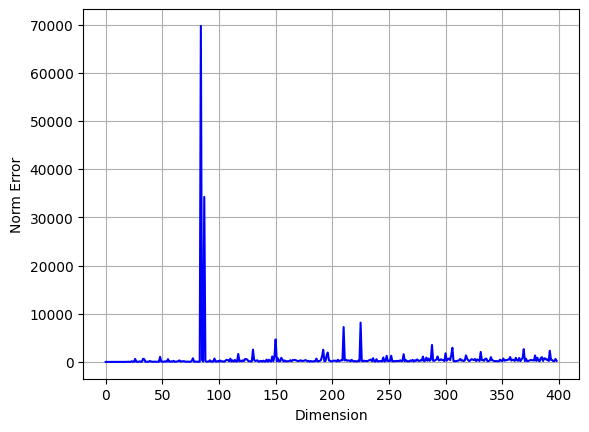

In [ ]:
norms = list() 
for d in range(1, 400): 
    H = create_hilbert(d)
    inv_H = np.linalg.inv(H)
    I = np.identity(d)
    norm = np.linalg.norm(I - H*inv_H)
    norms.append(norm)

print(norms)

plt.plot(norms, color = (0, 0, 1))
plt.xlabel("Dimension")
plt.ylabel("Norm Error")
plt.grid()
plt.show()


### Ερώτημα (ε) 

Από το διάγραμμα προκύπτει ότι η αντιστροφή των πινάκων Hilbert μπορεί να είναι υπολογιστικά ιδιαίτερα ασταθής, ειδικότερα για μεγαλύτερες διαστάσεις (π.χ. $n \geq 60$). Αυτό φαντάζει οξύμωρο, αφού (θεωρητικά) $\mathbf{Η}^{-1} \in \mathbb{Z}^{n\times n}$.

In [ ]:
t = np.array([i/49 for i in range(50)])
y = np.cos(4*t) + 0.1 * np.random.randn(t.shape[0])

A = np.matrix( np.empty((50, 5)) )
for i in range(A.shape[0]):
    for j in range(A.shape[1]): 
        A[i, j] = t[i]**j

coeffs_lu = np.empty(5)
coeffs_qr = np.empty(5)

tr_A = np.transpose(A)

# generate coefficients for the 4th degree polynomial using LU decomposition
coeffs_lu = solve_system(tr_A * A, tr_A * np.transpose(np.matrix(y)))
# generate the corresponding polynomial for the LU method; note the reverse order of the coefficients. 
poly_lu = np.poly1d([coeffs_lu[i, 0] for i in range(coeffs_lu.shape[0] - 1, -1, -1)])

# same for the QR decomposition
coeffs_qr = solve_system2(tr_A * A, tr_A * np.transpose(np.matrix(y)))
poly_qr = np.poly1d([coeffs_qr[i, 0] for i in range(coeffs_qr.shape[0] - 1, -1, -1)])

# generate the approximation arrays
y_lu = [poly_lu(time) for time in t]
y_qr = [poly_qr(time) for time in t]

# poly_good = np.polyfit(t.flatten(), y.flatten(), 4)
# y_good = np.polyval(poly_good, t.flatten())

LU Square Error: 0.5090132187110881
QR Square Error: 0.509013218717344


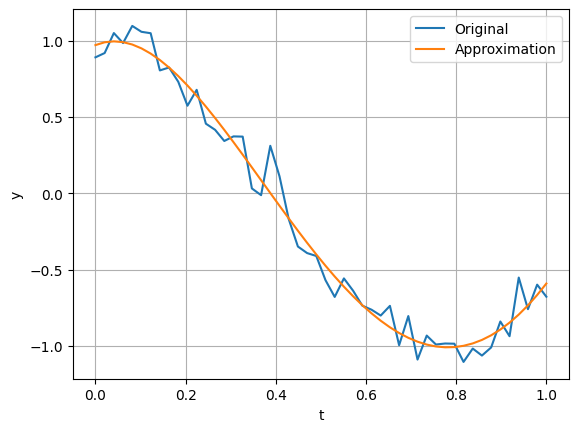

In [ ]:
error_lu = np.sum((y - y_lu) ** 2)
print(f'LU Square Error: {error_lu}')
error_qr = np.sum((y - y_qr) ** 2)  
print(f'QR Square Error: {error_qr}')

# y_good = np.polyval(poly_good, t.flatten()) 
# error_good = np.sum((y - y_good) ** 2)

# Both approximations are essentially equally accurate. Choosing the LU approximation for the sake of completeness. 
plt.plot(t, y, label='Original')
plt.plot(t, y_lu, label='Approximation')
# plt.plot(t, y_qr)
# plt.plot(t, y_good)


plt.legend(loc='upper right')
plt.grid()
plt.xlabel("t")
plt.ylabel("y")
plt.show()